# 作业3

**RBF拟合非线性函数实例**

In [3]:
#导入库
from scipy import *
from scipy.linalg import norm, pinv
 
from matplotlib import pyplot as plt
import numpy as np 


In [4]:
#设定RBF类
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return exp(-self.beta * norm(c-d)**2)
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        random.seed(10)
#        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
#        self.centers = [X[i,:] for i in rnd_idx]
        self.centers = X[random.choice(X.shape[0],self.numCenters)]
        
#        print ("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
#        print ('G \n',G)
         
        # calculate output weights (pseudoinverse)
        self.W = dot(pinv(G), Y)
        return self.centers, G 
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y
 


C:\Users\13950\AppData\Local\Temp/ipykernel_11676/3611890030.py:9: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  y = sin(3*(x+0.5)**3 - 1)
C:\Users\13950\AppData\Local\Temp/ipykernel_11676/1843053467.py:18: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  G = zeros((X.shape[0], self.numCenters), float)
C:\Users\13950\AppData\Local\Temp/ipykernel_11676/1843053467.py:14: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return exp(-self.beta * norm(c-d)**2)
C:\Users\13950\AppData\Local\Temp/ipykernel_11676/1843053467.py:40: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  self.W = dot(pinv(G), Y)
C:\Users\13950\AppData\Local\Temp/ipykernel_11676/1843053467.py:47: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  

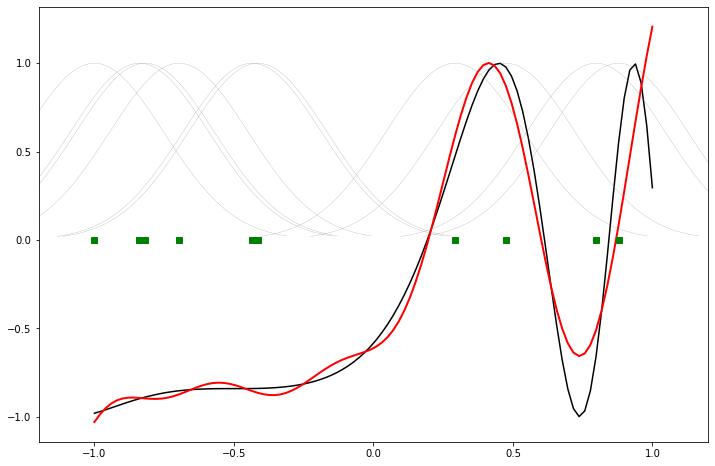

In [6]:
#案例拟合演示
if __name__ == '__main__':
    # ----- 1D Example ------------------------------------------------
    n = 100
     
#    x = mgrid[-1:1:complex(0,n)].reshape(n, 1)
    x = np.linspace(-1,1,n).reshape(n,1)
    # set y and add random noise
    y = sin(3*(x+0.5)**3 - 1)
    # y += random.normal(0, 0.1, y.shape)
     
    # rbf regression
    rbf = RBF(1, 10, 1)
    center, G = rbf.train(x, y)
    z = rbf.test(x)
       
    # plot original data
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'k-')
     
    # plot learned model
    plt.plot(x, z, 'r-', linewidth=2)
#     
    # plot rbfs
    plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')
     
    for c in rbf.centers:
        # RF prediction lines
        cx = arange(c-0.7, c+0.7, 0.01)
        cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
        plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
    plt.xlim(-1.2, 1.2)
    plt.show()
